In [5]:
import time
import sys, os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
np.random.seed(42)

In [23]:
# KL to df
KL_out = {}
with open("./Fly_sub.out", "r") as input:
    for line in input.readlines():
        if line.startswith("#"):
            continue
        if not line:
            continue
        line = line.strip()
        line = line.split("\t")

        A, B, score = line
        
        KL = float(score.split(";")[0])
        A = A.replace("./UMAP/fasta/cluster_", "").replace(".txt", "").replace("_TypeI", "").split(":")[0]
        B = B.replace("./UMAP/fasta/cluster_", "").replace(".txt", "").replace("_TypeI", "").split(":")[0]
        if A not in KL_out:
            KL_out[A] = {}
        if B not in KL_out:
            KL_out[B] = {}
        KL_out[A][B] = KL
df_KL = pd.DataFrame(KL_out)

In [24]:
df_KL = df_KL[["Human", "Mouse", "XT", "XL", "ZF", "Fly", "Fly_sub1", "Fly_sub2", "Fly_sub3"]]
df_KL = df_KL.loc[["Human", "Mouse", "XT", "XL", "ZF", "Fly", "Fly_sub1", "Fly_sub2", "Fly_sub3"]]


In [25]:
mask = np.triu(np.ones_like(df_KL))

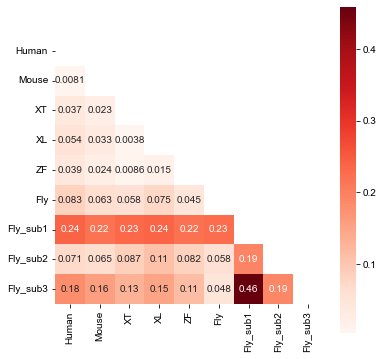

In [26]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_KL, square=True, mask=mask, annot=True, cmap="Reds", vmin=0, vmax=0.5)
plt.savefig("KL_divergence.pdf")